In [5]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp
import matplotlib.image as mpimg
import imageio


## Problem 7 - Minimax rational fit to the exponential. 

In [6]:
k = 201
t = np.linspace(-3, 3, k)[:, np.newaxis]
y = np.exp(t)
t_equation = np.hstack((np.ones((k, 1)), t, t**2))

u = np.exp(3)
l = 0
error_term = 1e-3

while u - l >= error_term:
    lamda = (l + u) / 2
    
    a = cp.Variable(3)
    b = cp.Variable(2)
    
    constraints = [
        cp.abs(t_equation @ a - y * (t_equation @ np.hstack((np.ones((k, 1)), b)))) <= lamda * t_equation @ np.hstack((np.ones((k, 1)), b))
    ]
    
    prob = cp.Problem(cp.Minimize(0), constraints)
    prob.solve()
    
    if prob.status == 'optimal':
        u = lamda
        a_opt = a.value
        b_opt = b.value
        objval_opt = lamda
    else:
        l = lamda

y_fit = t_equation @ a_opt / (t_equation @ np.vstack((np.ones((1, 1)), b_opt)))

print("Optimal a:", a_opt)
print("Optimal b:", b_opt)
print("Objective value:", objval_opt)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

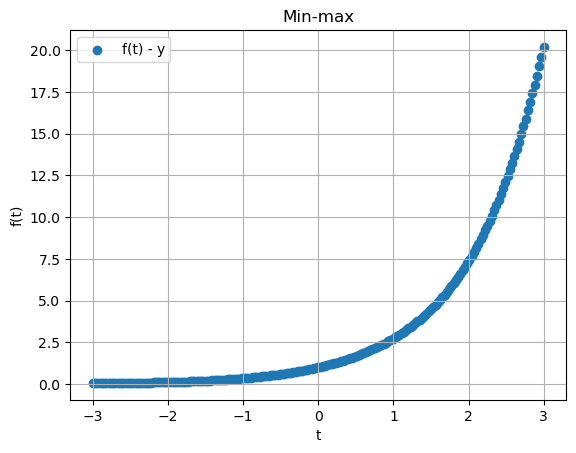

In [9]:
def f(t, a, b):
    numerator = a[0] + a[1]*t + a[2]*t**2
    denominator = 1 + b[0]*t + b[1]*t**2
    return numerator / denominator

a = [1.010, 0.6117, 0.1134]
b = [-0.4150, 0.0485]

# Calculate f(t)
function_values = f(t, a, b)
function_values = np.array(function_values).flatten()
function_values = function_values.reshape(-1, 1)
y = np.exp(t)

plt.scatter(t, function_values, label='f(t) - y')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Min-max')
plt.legend()
plt.grid(True)
plt.show()

(201, 1)
(201, 1)
(201, 1)


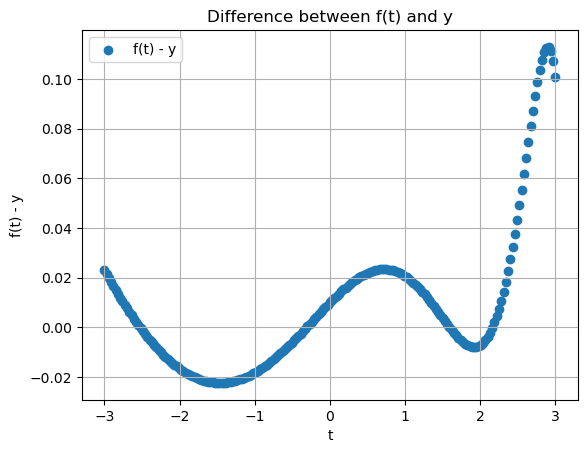

In [8]:
def f(t, a, b):
    numerator = a[0] + a[1]*t + a[2]*t**2
    denominator = 1 + b[0]*t + b[1]*t**2
    return numerator / denominator

a = [1.010, 0.6117, 0.1134]
b = [-0.4150, 0.0485]

# Calculate f(t)
function_values = f(t, a, b)
function_values = np.array(function_values).flatten()
function_values = function_values.reshape(-1, 1)
y = np.exp(t)
print(t.shape)
print(function_values.shape)
print(y.shape)
# Plot the graph
plt.scatter(t, function_values - y, label='f(t) - y')
plt.xlabel('t')
plt.ylabel('f(t) - y')
plt.title('Difference between f(t) and y')
plt.legend()
plt.grid(True)
plt.show()

## Problem 8 - Total variation image interpolation.

/var/folders/j2/8nvwk7s933q9gmx31pd802rc0000gn/T/ipykernel_28134/16732546.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  Uorig = imageio.imread('figures/tv_img_interp.png').astype(float)
/Users/rishabhmandayam/anaconda3/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


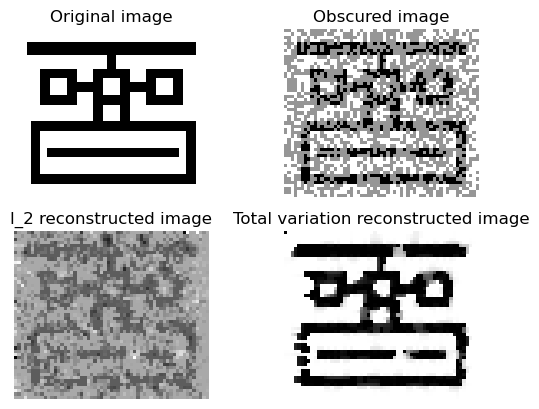

In [5]:
# Load original image.
Uorig = imageio.imread('figures/tv_img_interp.png').astype(float)

m, n = Uorig.shape

# Create 50% mask of known pixels.
np.random.seed(1029)
Known = np.random.rand(m, n) > 0.5

# Placeholder:

#l2
Ul2 = cp.Variable((m, n))
constraints = [Ul2[Known] == Uorig[Known]]

Ux = Ul2[1:, 1:] - Ul2[1:, :-1]
Uy = Ul2[1:, 1:] - Ul2[:-1, 1:]

objective = cp.norm(cp.vstack([Ux, Uy]), p=2)

prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve()

Utv = cp.Variable((m, n))
constraints = [Utv[Known] == Uorig[Known]]

Ux = Utv[1:, 1:] - Utv[1:, :-1]
Uy = Utv[1:, 1:] - Utv[:-1, 1:]

objective = cp.norm(cp.vstack([Ux, Uy]), p=1)

prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve()

# Graph everything.
plt.figure(1)
plt.clf()
plt.gray()

plt.subplot(2, 2, 1)
plt.imshow(Uorig, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(Known*Uorig + 256-150*Known, cmap='gray')
plt.title('Obscured image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(Ul2.value, cmap='gray')
plt.title('l_2 reconstructed image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(Utv.value, cmap='gray')
plt.title('Total variation reconstructed image')
plt.axis('off')

plt.show()

## Problem 9 - Colorization with total variation regularization

In [42]:
u_orig = plt.imread("figures/flower.png")
rows, cols, colors = u_orig.shape

# known is 1 if the pixel is known,
# 0 if the pixel was corrupted.
# The known matrix is initialized randomly.
known = np.zeros((rows, cols, colors))
for i in range(rows):
    for j in range(cols):
        if np.random.random() > 0.7:
            for k in range(colors):
                known[i, j, k] = 1
u_corr = known * u_orig

print(known[:,:,0].shape)

(50, 50)


(50, 50)
(250,)


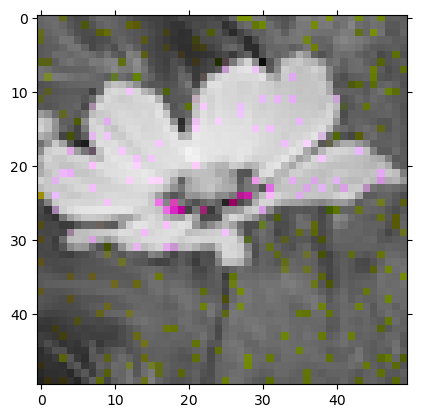

In [43]:
img = mpimg.imread("figures/flower.png")
img = img[:,:,0:3]
m,n,colors = img.shape

np.random.seed(5)
known_ind = np.where(np.random.rand(m,n) >= 0.90)
# grayscale image
M = 0.299*img[:,:,0]+0.587*img[:,:,1]+0.114*img[:,:,2]
# known color values
R_known = img[:,:,0]
print(R_known.shape)
G_known = img[:,:,1]
B_known = img[:,:,2]
R_known = R_known[known_ind]
print(R_known.shape)
G_known = G_known[known_ind]
B_known = B_known[known_ind]

def save_img(filename, R,G,B):
  img = np.stack((np.array(R),np.array(G),np.array(B)), axis=2)
  # turn off ticks and labels of the figure
  plt.tick_params(
    axis='both', which='both', labelleft='off', labelbottom='off',
    bottom='off', top='off', right='off', left='off'
  )
  fig = plt.imshow(img)
  plt.savefig(filename,bbox_inches='tight',pad_inches=0.)

R_given = np.copy(M);
R_given[known_ind] = R_known;
G_given = np.copy(M);
G_given[known_ind] = G_known;
B_given = np.copy(M);
B_given[known_ind] = B_known;
save_img("flower_given.png", R_given, G_given, B_given)

In [71]:
variables = []
constraints = []
print(R_given[known_ind])
R_Val = cp.Variable(shape=(m, n))
variables.append(R_Val)
constraints.append(R_Val[known_ind] == R_given[known_ind])

B_Val = cp.Variable(shape=(m, n))
variables.append(B_Val)
constraints.append(B_Val[known_ind] == B_given[known_ind])

G_Val = cp.Variable(shape=(m, n))
variables.append(G_Val)
constraints.append(G_Val[known_ind] == G_given[known_ind])

prob = cp.Problem(cp.Minimize(cp.tv(*variables)), constraints=constraints)
prob.solve(verbose=True, solver=cp.SCS)
print("optimal objective value: {}".format(prob.value))

[0.38431373 0.4745098  0.4745098  0.49019608 0.4509804  0.42745098
 0.3019608  0.37254903 0.34901962 0.3882353  0.43137255 0.45882353
 0.39607844 0.34509805 0.39607844 0.2627451  0.30588236 0.38039216
 0.47058824 0.3764706  0.34509805 0.24705882 0.44705883 0.27058825
 0.23921569 0.2509804  0.4392157  0.36078432 0.24313726 0.35686275
 0.34509805 0.34509805 0.3764706  0.23921569 0.1254902  0.3254902
 0.33333334 0.77254903 0.9372549  0.41960785 0.36078432 0.47843137
 0.3764706  0.3882353  0.36078432 0.88235295 0.39607844 0.3137255
 0.34509805 0.3529412  0.34509805 0.96862745 0.3019608  0.41568628
 0.36078432 0.34117648 0.75686276 0.9098039  0.9254902  0.90588236
 0.7921569  0.654902   0.3529412  0.96862745 0.92941177 0.30980393
 0.38431373 0.3882353  0.94509804 0.29803923 0.8862745  0.92941177
 0.972549   0.9137255  0.9843137  0.9607843  0.9529412  0.38039216
 0.26666668 0.8980392  0.9372549  0.84705883 0.30980393 0.34117648
 0.96862745 0.9372549  0.9764706  0.38039216 0.8862745  0.403921

(CVXPY) Apr 12 10:05:38 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Apr 12 10:05:38 AM: Applying reduction Dcp2Cone
(CVXPY) Apr 12 10:05:38 AM: Applying reduction CvxAttr2Constr
(CVXPY) Apr 12 10:05:38 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Apr 12 10:05:38 AM: Applying reduction SCS
(CVXPY) Apr 12 10:05:38 AM: Finished problem compilation (took 1.768e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Apr 12 10:05:38 AM: Invoking solver SCS  to obtain a solution.
------------------------------------------------------------------
	       SCS v3.2.4 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 9901, constraints 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.38058745 0.38018682 0.38047071 ... 0.41465346 0.4146518  0.4146518 ]
 [0.38098808 0.37728486 0.377283   ... 0.41465515 0.41465014 0.41465014]
 [0.39607844 0.37728677 0.37699623 ... 0.41466111 0.41464347 0.41464347]
 ...
 [0.20784314 0.2880227  0.30930579 ... 0.36470587 0.34509805 0.34509805]
 [0.26366973 0.26366971 0.30302625 ... 0.36470587 0.34509805 0.34509805]
 [0.26366973 0.21568628 0.30302625 ... 0.36470587 0.34117648 0.        ]]


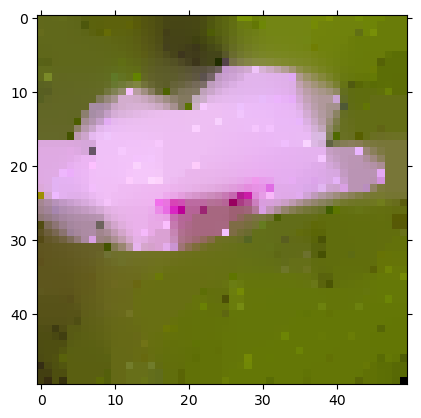

In [72]:
print(R_Val.value)
save_img("flower_reconstructed.png", R_Val.value, G_Val.value, B_Val.value)

## Problem 11 - Maximum likelihood estimation of an increasing nonnegative signal

In [23]:
np.random.seed(1)
N = 100

# create an increasing input signal
xtrue = np.zeros(N)
xtrue[0:40] = 0.1
xtrue[49] = 2
xtrue[69:80] = 0.15
xtrue[79] = 1
xtrue = np.cumsum(xtrue)

# pass the increasing input through a moving-average filter 
# and add Gaussian noise
h = np.array([1, -0.85, 0.7, -0.3])
k = h.size
yhat = np.convolve(h,xtrue)
y = yhat[0:-3].reshape(N,1) + np.random.randn(N,1)

xtrue = np.asmatrix(xtrue.reshape(N,1))
y = np.asmatrix(y)

In [30]:
x = cp.Variable((100,),nonneg = True)
print(x.shape)

y_hat = cp.conv(h,x)

error = y - y_hat[:-3]


constraints = [cp.diff(x) >= 0]

objective = cp.Minimize(cp.sum_squares(error))

prob=cp.Problem(objective,constraints)
prob.solve()

print("Optimal value of x:")
print(x.value)

print(xtrue)

(100,)


ValueError: Cannot broadcast dimensions  (100, 1) (100,)

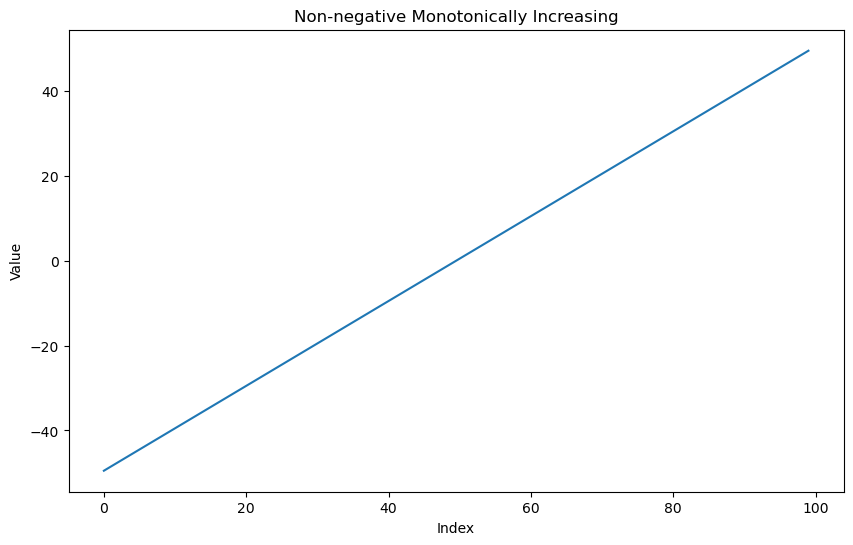

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x.value)
plt.title("Non-negative Monotonically Increasing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()